Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [2]:
startups_data=pd.read_csv("50_Startups.csv")
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Initial Investigation

In [3]:
startups_data.shape

(50, 5)

In [4]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
startups_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Data Preprocessing

In [7]:
startups_data=startups_data.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)
startups_data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Assumptions Check

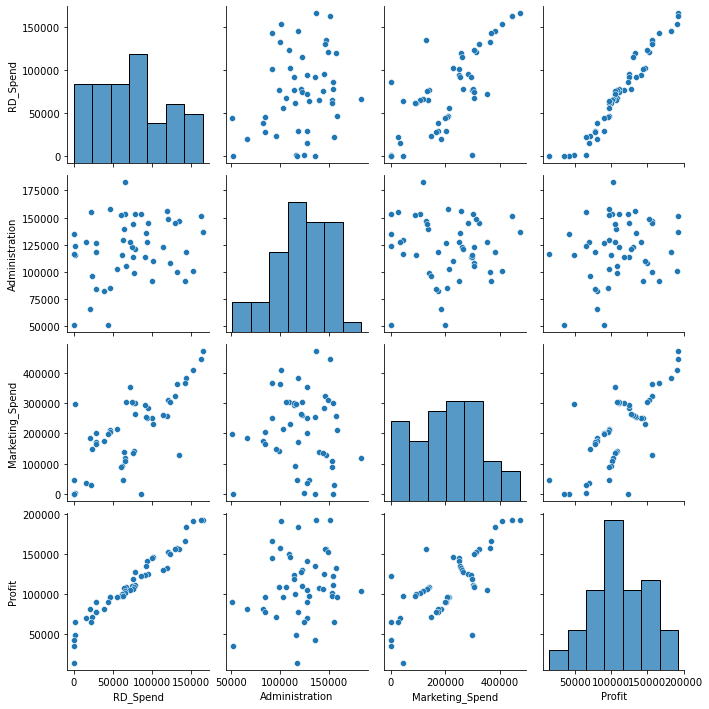

In [8]:
sns.pairplot(startups_data)

In [9]:
startups_data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Model Building

In [10]:
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startups_data).fit()

In [11]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [12]:
model.pvalues   

Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [13]:
model.aic,model.rsquared    #Model accuracy is 95.07%

(1058.7714985998055, 0.9507459940683246)

### Model Optimization

In [14]:
#Build SLR and MLR for insignificant variables Administration and Marketing Spend

In [15]:
model2=smf.ols('Profit~Administration',data=startups_data).fit()

In [16]:
model2.pvalues 

Intercept         0.003824
Administration    0.162217
dtype: float64

In [17]:
model3=smf.ols('Profit~Marketing_Spend',data=startups_data).fit()

In [18]:
model3.pvalues 

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [19]:
model4=smf.ols('Profit~Administration+Marketing_Spend',data=startups_data).fit()

In [20]:
model4.pvalues 

Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64

### Model Validation

### Collinearity Check and Residual Analysis

Calculating VIF

In [21]:
rsq_r=smf.ols("RD_Spend~Administration+Marketing_Spend",data=startups_data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RD_Spend+Marketing_Spend",data=startups_data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing_Spend~RD_Spend+Administration",data=startups_data).fit().rsquared
vif_m=1/(1-rsq_m)

# Storing vif values in a data frame
d1={'Variables':['RD_Spend','Administration','Marketing_Spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


Test for Normality of Residuals (Q-Q Plot)

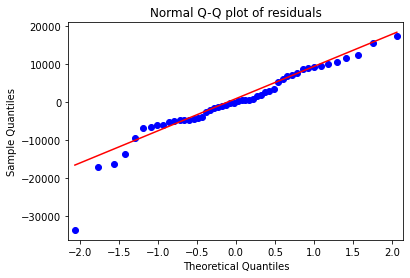

In [22]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid<-30000))  #outlier detection from qq plot

[array([49], dtype=int64)]

### Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

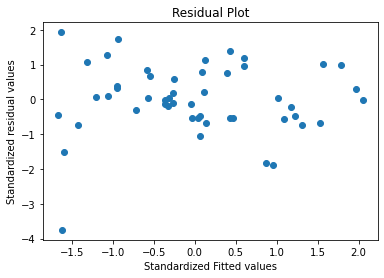

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [26]:
#Test for Residuals v/s Regressors

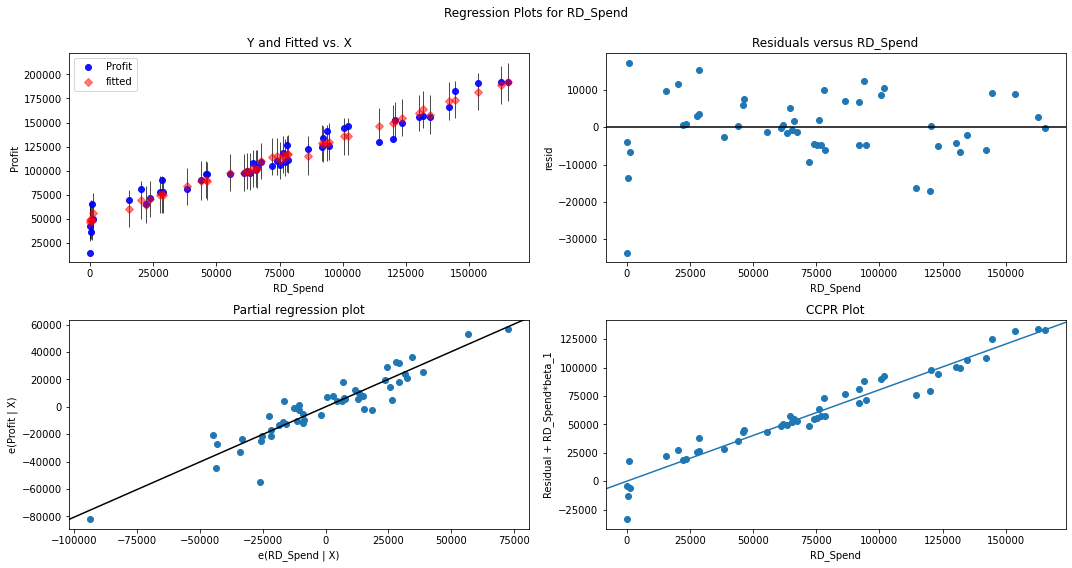

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

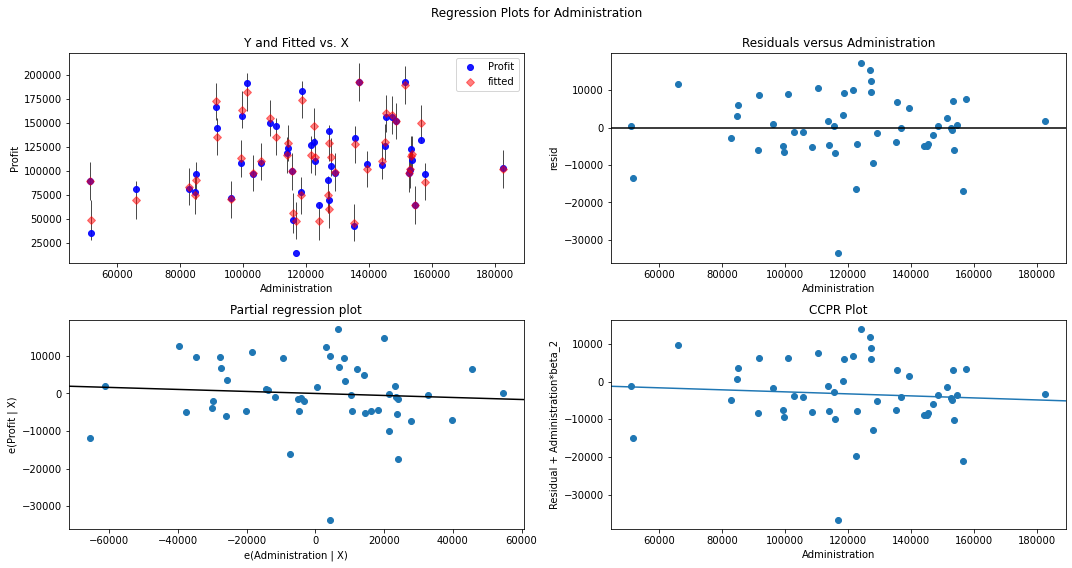

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

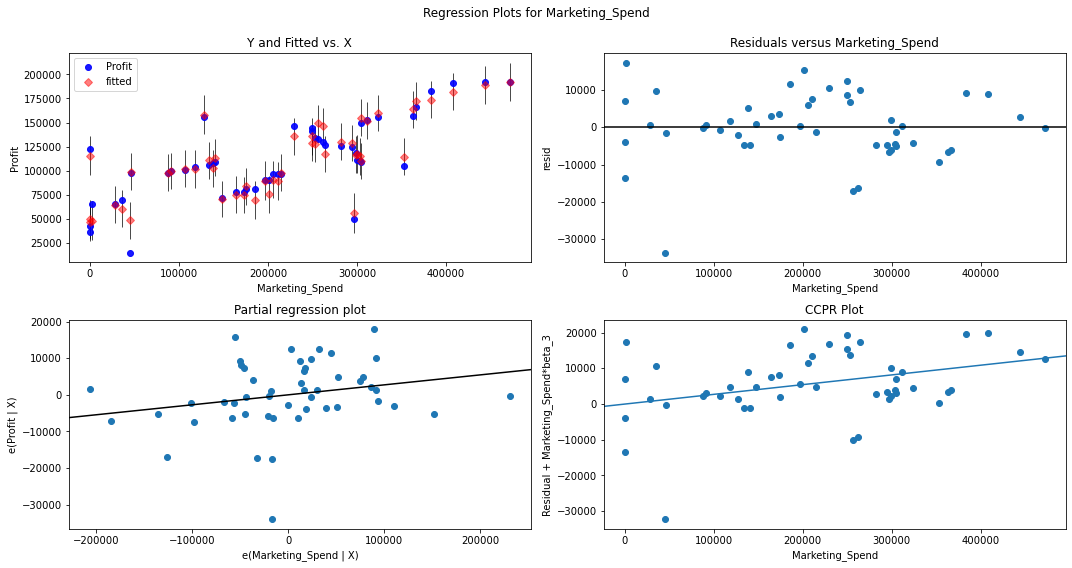

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

### Model Deletion Diagnostics
Detecting Influencers/Outliers.
Cook’s Distance

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

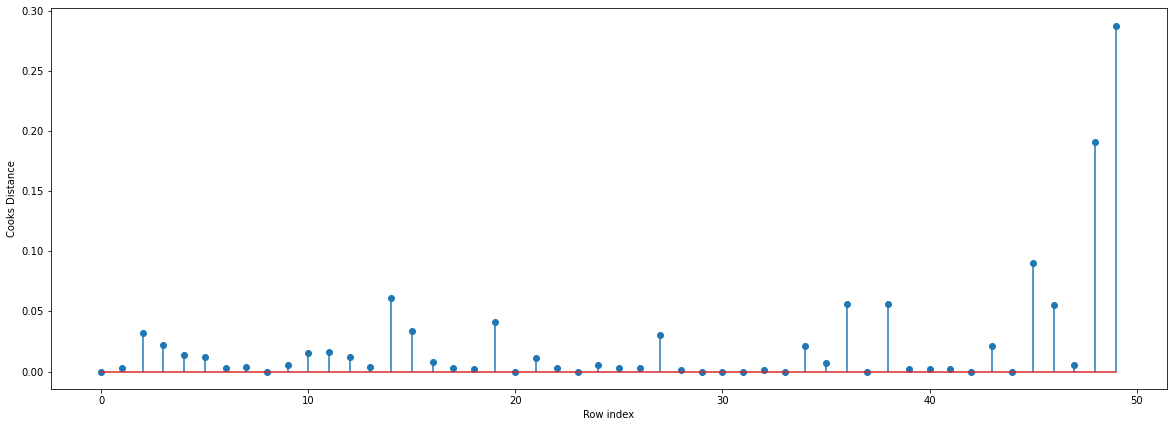

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

### High Influence points

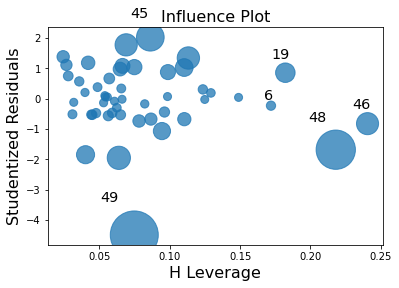

In [33]:
influence_plot(model)
plt.show()

In [34]:
# Leverage cutoff = 3*(k+1)/n; k = number of features
k = startups_data.shape[1]
n = startups_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [35]:
startups_data[startups_data.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


### Improving the model

In [36]:
startups_data1=startups_data.drop(startups_data.index[[49]],axis=0).reset_index(drop=True)
startups_data1

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Building Final Model

In [37]:
final_model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=startups_data1).fit()

In [38]:
final_model.aic,final_model.rsquared

(1020.5652974526367, 0.9613162435129847)

### Predicting for new data

In [39]:
#New data for prediction
new_data=pd.DataFrame({'RD_Spend':60000,"Administration":80000,"Marketing_Spend":100000},index=[1])

In [40]:
final_model.predict(new_data)  #prediction of profit for new data

1    100109.804713
dtype: float64

In [41]:
pred_y = final_model.predict(startups_data1) #prediction of profit with 96.13% accuracy
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### Table containing R^2 value for each prepared model

In [42]:
table=pd.DataFrame({'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]})
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
